<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li></ul></li><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Изучение-и-предобработка-данных" data-toc-modified-id="Изучение-и-предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение и предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Расчет-прибыли" data-toc-modified-id="Расчет-прибыли-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Расчет прибыли</a></span></li><li><span><a href="#Написание-функции-подсчета-прибыльности-скважин" data-toc-modified-id="Написание-функции-подсчета-прибыльности-скважин-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Написание функции подсчета прибыльности скважин</a></span></li><li><span><a href="#Расчет-прибыльности-и-рисков-в-регионе" data-toc-modified-id="Расчет-прибыльности-и-рисков-в-регионе-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Расчет прибыльности и рисков в регионе</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li></ul></div>

## Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Шаги для выбора локации обычно такие:
* В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
* Строят модель для предсказания объёма запасов в новых скважинах;
* Выбирают скважины с самыми высокими оценками значений;
* Определяют регион с максимальной суммарной прибылью отобранных скважин.

Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

##  Изучение и предобработка данных 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
from numpy.random import RandomState
import numpy as np
from scipy import stats as st

Загрузка датасетов с сервера Яндекса

In [2]:
data1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
data1.name = 'data1'

data2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
data2.name = 'data2'

data3 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')
data3.name = 'data3'

Заранее известно, что датасеты однотипны, поэтому изучим их содержание по первому

In [3]:
data1.sample(3)

,id,f0,f1,f2,product
81436,hbMtn,-0.651560,0.709093,3.945005,146.131866
92582,i26xZ,0.515805,0.992614,5.513798,102.593326
99770,O89LU,0.189524,1.096069,5.467327,108.557669


`id` - идентификатор скважины,  `f0`, `f1`, `f2` - характеристики скважины. `product` - объем запасов в скважине

Выведем общую информацию по всем датасетам, чтобы определить, нет ли в них пропусков и неверных типов данных

In [4]:
for dataset in [data1, data2, data3]:
    print('******\nИнформация по', dataset.name, '\n******')
    dataset.info()
    print('\n\n')

******
Информация по data1 
******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB



******
Информация по data2 
******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB



******
Информация по data3 
******
<class 'pandas.core.f

Пропусков нет, все типы верны

Исследуем корреляцию признаков с целевой переменной

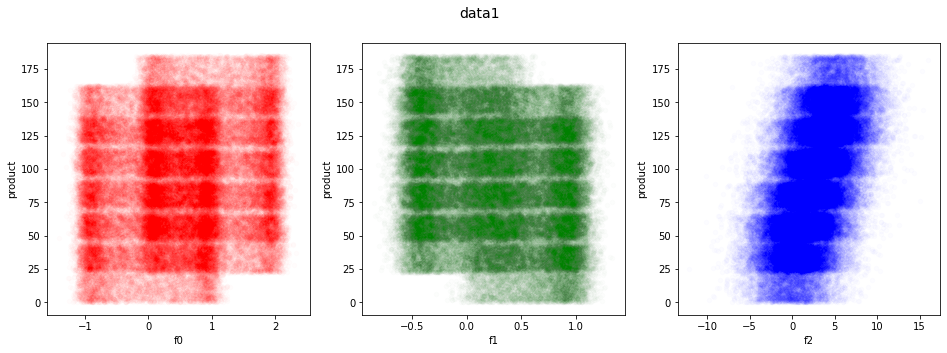

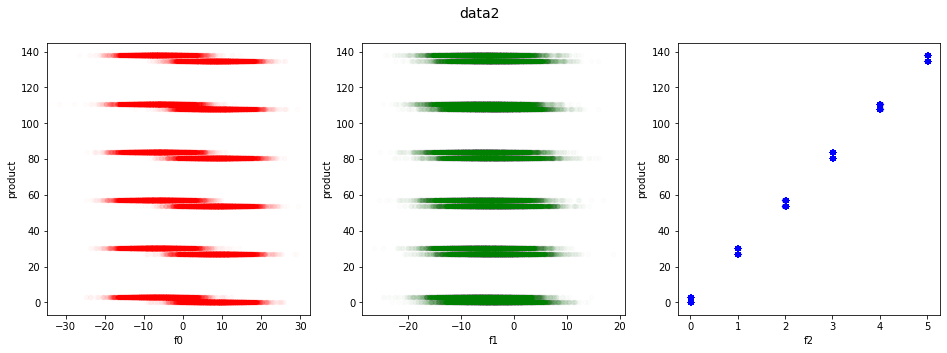

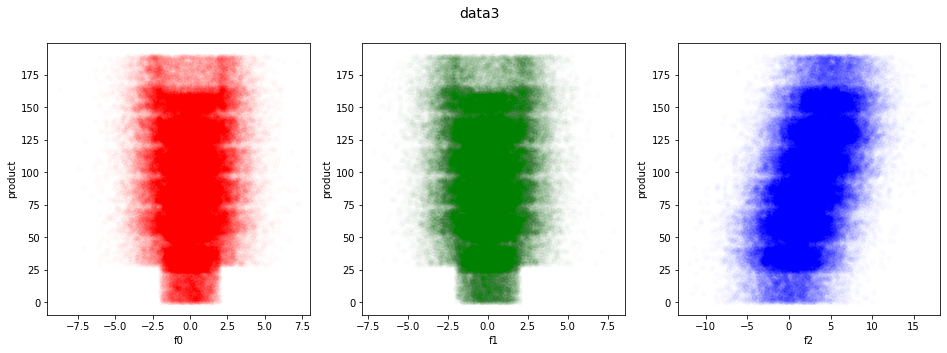

In [5]:
for dataset in [data1, data2, data3]:
    plt.figure(figsize=(16, 5))
    
    
    plt.suptitle(dataset.name, size=14)
    
    ax = plt.subplot(1,3,1)
    dataset.plot.scatter(x='f0', y='product', alpha=0.01, ax=ax, color='red')

    ax = plt.subplot(1,3,2)
    dataset.plot.scatter(x='f1', y='product', alpha=0.01, ax=ax, color='green')

    ax = plt.subplot(1,3,3)
    dataset.plot.scatter(x='f2', y='product', alpha=0.01, ax=ax, color='blue')


У признака `f2`, особенно во втором датасете, сильная корреляция с целевой переменной, поэтому от этого признака стоило бы избавиться, потому что вероятно это следствие утечки целевой переменной. Иначе геологам не понадобилась бы помощь машинного обучения. Однако в рамках задачи примем все переменные как важные, просто будем иметь в виду, что для второго региона модель машинного обучения практически не будет опираться на первые два признака.

In [6]:
data1_features = data1[['f0', 'f1', 'f2']]
data1_target = data1['product']

data2_features = data2[['f0', 'f1', 'f2']]
data2_target = data2['product']

data3_features = data3[['f0', 'f1', 'f2']]
data3_target = data3['product']

Разобьем каждый датасет на обучающую и валидационную выборки в соотношении 3:1

In [7]:
def splitter(features, target, test_size):
    return train_test_split(features, target, test_size=test_size, random_state=123)

In [8]:
data1_features_train, data1_features_valid, data1_target_train, data1_target_valid = splitter(data1_features, 
                                                                                              data1_target, 
                                                                                              test_size=0.25)

data2_features_train, data2_features_valid, data2_target_train, data2_target_valid = splitter(data2_features, 
                                                                                              data2_target, 
                                                                                              test_size=0.25)

data3_features_train, data3_features_valid, data3_target_train, data3_target_valid = splitter(data3_features, 
                                                                                              data3_target, 
                                                                                              test_size=0.25)

Обучим модель на данных по каждому региону и выведем предсказанные объемы залежей нефти, а также погрешность, с которой она была оценена.

In [9]:
model1 = LinearRegression(n_jobs=-1)
model1.fit(data1_features_train, data1_target_train)
data1_target_predicted = pd.Series(model1.predict(data1_features_valid), index=data1_target_valid.index)

print('Средний запас предсказанного сырья:', round(data1_target_predicted.mean(), 2))
print('RMSE модели:', mse(data1_target_valid, data1_target_predicted, squared=False).round(2))
print('MAE модели:', mae(data1_target_valid, data1_target_predicted).round(2))

Средний запас предсказанного сырья: 92.55
RMSE модели: 37.65
MAE модели: 30.98


In [10]:
model2 = LinearRegression(n_jobs=-1)
model2.fit(data2_features_train, data2_target_train)
data2_target_predicted = pd.Series(model2.predict(data2_features_valid), index=data2_target_valid.index)

print('Средний запас предсказанного сырья:', round(data2_target_predicted.mean(), 2))
print('RMSE модели:', mse(data2_target_valid, data2_target_predicted, squared=False).round(2))
print('MAE модели:', mae(data2_target_valid, data2_target_predicted).round(2))

Средний запас предсказанного сырья: 69.28
RMSE модели: 0.9
MAE модели: 0.72


In [11]:
model3 = LinearRegression(n_jobs=-1)
model3.fit(data3_features_train, data3_target_train)
data3_target_predicted = pd.Series(model3.predict(data3_features_valid), index=data3_target_valid.index)

print('Средний запас предсказанного сырья:', round(data3_target_predicted.mean(), 2))
print('RMSE модели:', mse(data3_target_valid, data3_target_predicted, squared=False).round(2))
print('MAE модели:', mae(data3_target_valid, data3_target_predicted).round(2))

Средний запас предсказанного сырья: 95.1
RMSE модели: 40.13
MAE модели: 32.81


Вывод

Как и ожидалось, для второго региона очень высокая точность модели, связанная с простым линейным характером зависимости. Для первого и третьего региона ошибка достаточно высока.

### Расчет прибыли

Рассчитаем объем продукта, добываемого с двухсот скважин, необходимый для безубыточности проекта

In [12]:
BUDGET = 10e9
PROFIT_PER_VOLUME = 450e3

BUDGET / (200 * PROFIT_PER_VOLUME)

111.11111111111111

Выглядит, как будто с комплекса разрабатываемых скважин нужно добывать не менее 111 тыс баррелей нефти, чтобы проект окупил себя. В среднем скважины в каждом регионе приносят не более 95 тысяч. Вся надежда на то, средний запас двухсот самых перспективных скважин из пятисот исследуемых окажется выше.

### Написание функции подсчета прибыльности скважин

Напишем функцию, которая для выбранного месторождения предсказывает двести самых перспективных мест, считаем по ним ожидаемую прибыль, а также рассчитывает реальную прибыльность этих месторождений по известным историческим данным.

In [13]:
def region_perspectivity(data_true, data_predicted):
    top_sources_predicted = data_predicted.sort_values(ascending=False).head(200)
    profit_predicted = (top_sources_predicted.sum() * PROFIT_PER_VOLUME - BUDGET) / 1e9
    
    profit_true = (data_true[top_sources_predicted.index].sum() * PROFIT_PER_VOLUME - BUDGET) / 1e9
    return (profit_true.round(3), profit_predicted.round(3))   

In [14]:
print(region_perspectivity(data1_target_valid, data1_target_predicted))

(3.535, 3.966)


In [15]:
aa = region_perspectivity(data1_target_valid, data1_target_predicted)[0]
aa

3.535

In [16]:
print(region_perspectivity(data2_target_valid, data2_target_predicted))

(2.415, 2.49)


In [17]:
print(region_perspectivity(data3_target_valid, data3_target_predicted))

(2.37, 3.475)


Вывод

Реальная прибыльность предсказуемо меньше, но остается выше нуля.

### Расчет прибыльности и рисков в регионе

При помощи техники Bootstrap многократно смоделируем ситуацию, когда геологи выбирают 500 случайных скважин в регионе, исследуют их и выбирают 200 самых богатых для разработки. Такая методика позволит оценить среднюю прибыльность от исследования 500 скважин и исключить случайность.

In [18]:
def bootstrap(data_true, data_predicted):
    state = RandomState(123)
    total_profits = []
    for i in range(0,1000): #100000
        strap = data_predicted.sample(n=500, replace=True, random_state=state)
        
        total_profits.append(region_perspectivity(data_true, strap)[0])

        #top_predicted_sources = strap.sort_values(ascending=False).head(200)
        #top_predicted_sources_real_profit = (data_true[top_predicted_sources.index].sum() * 450e3 - 10e9) / 1e9
        #total_profits.append(top_predicted_sources_real_profit)
        
    return(total_profits)

In [19]:
region1_profits = pd.Series(bootstrap(data1_target_valid, data1_target_predicted))
region2_profits = pd.Series(bootstrap(data2_target_valid, data2_target_predicted))
region3_profits = pd.Series(bootstrap(data3_target_valid, data3_target_predicted))

Построим гистограммы прибыльности каждого региона

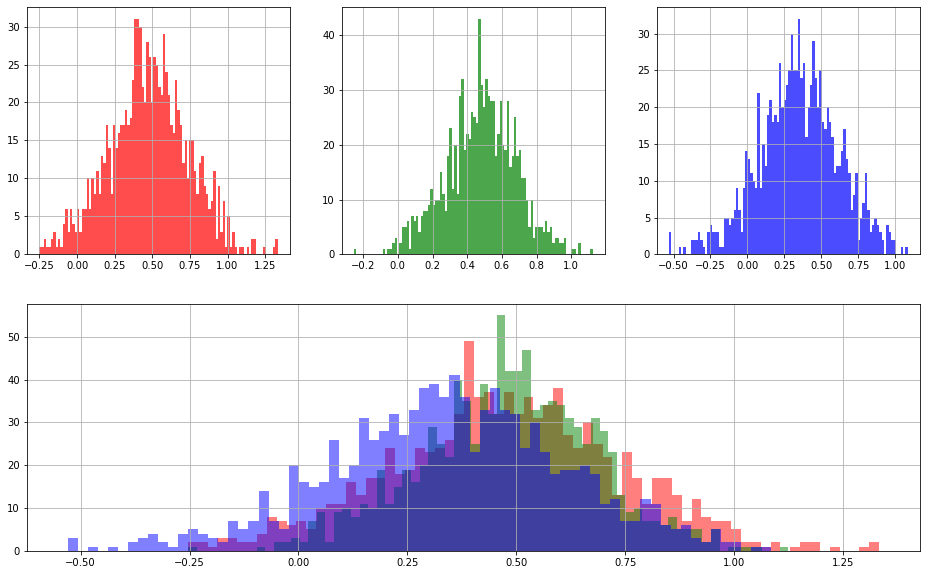

In [20]:
fig = plt.figure(figsize=(16,10))

ax1 = fig.add_subplot(2,3,1)
region1_profits.hist(bins=100, alpha=0.7, color='red', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
region2_profits.hist(bins=100, alpha=0.7, color='green', ax=ax2);

ax3 = fig.add_subplot(2,3,3)
region3_profits.hist(bins=100, alpha=0.7, color='blue', ax=ax3);

ax4 = fig.add_subplot(2,1,2)
region1_profits.hist(bins=70, color='red', alpha=0.5, ax=ax4)
region2_profits.hist(bins=70, color='green', alpha=0.5, ax=ax4)
region3_profits.hist(bins=70, color='blue', alpha=0.5, ax=ax4);

На совмещенной гистограмме видно, что средная прибыльность выше во втором регионе, однако она почти совпадает с прибыльностью первого региона

Найдем среднюю прибыль для регионов

In [21]:
print('Средняя прибыль в первом регионе равна', round(region1_profits.mean(), 3))

Средняя прибыль в первом регионе равна 0.477


In [22]:
print('Средняя прибыль во втором регионе равна', round(region2_profits.mean(), 3))

Средняя прибыль во втором регионе равна 0.479


In [23]:
print('Средняя прибыль в третьем регионе равна', round(region3_profits.mean(), 3))

Средняя прибыль в третьем регионе равна 0.343


Найдем 95% доверительный интервал. Это значит, что с вероятностью 95% среднее генеральной совокупности будет находиться в указанном диапазоне.

In [24]:
def mean_conf_interval(distribution, level):

    confidence_interval = st.t.interval(alpha=level, 
                                        df=distribution.shape[0]-1, 
                                        loc=distribution.mean(), 
                                        scale=distribution.sem())
    return confidence_interval[0].round(4), confidence_interval[1].round(4)
    

In [25]:
print('С вероятностью 95% средняя прибыль первого региона находится в интервале', mean_conf_interval(region1_profits, 0.95))

С вероятностью 95% средняя прибыль первого региона находится в интервале (0.461, 0.4938)


In [26]:
print('С вероятностью 95% средняя прибыль второго региона находится в интервале', mean_conf_interval(region2_profits, 0.95))

С вероятностью 95% средняя прибыль второго региона находится в интервале (0.4667, 0.4917)


In [27]:
print('С вероятностью 95% средняя прибыль третьего региона находится в интервале', mean_conf_interval(region3_profits, 0.95))

С вероятностью 95% средняя прибыль третьего региона находится в интервале (0.3267, 0.3602)


Найдем 95% доверительный интервал в том смысле, что отбросим по 2.5% крайних значений

In [28]:
def conf_interval(distribution, level):
    return distribution.quantile((1 - level)/2).round(3), distribution.quantile((1 + level)/2).round(3)

In [29]:
print('95% найденных значений в первом регионе лежат в интервале', conf_interval(region1_profits, 0.95))

95% найденных значений в первом регионе лежат в интервале (-0.058, 0.975)


In [30]:
print('95% найденных значений во втором регионе лежат в интервале', conf_interval(region2_profits, 0.95))

95% найденных значений во втором регионе лежат в интервале (0.059, 0.874)


In [31]:
print('95% найденных значений в третьем регионе лежат в интервале', conf_interval(region3_profits, 0.95))

95% найденных значений в третьем регионе лежат в интервале (-0.231, 0.861)


Найдем риск убытков. Для этого определим p-уровень значимости следующего события: для исследования в регионе случайным образом были выбраны 500 таких точек, в которых запасы даже двухсот самых крупных скважин не компенсируют затраты на их разработку. Одновременно с этим вычислим долю значений в бутстрапе, величина которых меньше нуля.

In [32]:
def risk_checker(distribution, risk_value):
    sigmas = -1 * (distribution.mean() - risk_value) / np.std(distribution)
    print (st.norm.cdf(sigmas).round(55))

Первый регион

In [33]:
(risk_checker(region1_profits, 0))

0.035222858855742736


In [34]:
region1_profits[region1_profits<0].shape[0] / region1_profits.shape[0]

0.041

In [35]:
(region1_profits<0).mean()

0.041

Второй регион

In [36]:
(risk_checker(region2_profits, 0))

0.008497681893851722


In [37]:
region2_profits[region2_profits<0].shape[0] / region2_profits.shape[0]

0.009

Третий регион

In [38]:
(risk_checker(region3_profits, 0))

0.10115849010890371


In [39]:
region3_profits[region3_profits<0].shape[0] / region3_profits.shape[0]

0.098

### Общий вывод

* У обученных моделей метрики качества предсказания RMSE и MAE сильно отличаются
* Средний запас изведанных месторождений ниже (до 95 тыс баррелей), чем требуется для безубыточного освоения (около 111 тыс. баррелей), поэтому недостаточно взять случайные 200 точек для освоения
* Третий регион, несмотря на самые высокие средние запасы сырья, является наименее доходным и наиболее рискованным.
* В первом регионе выше прибыльность, но выше и риски
* Рекомендуем геологам разрабатывать второй регион либо, если есть такая возможность, повысить число исследуемых точек.